In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve,
    precision_recall_curve
)

from sklearn.calibration import calibration_curve


In [2]:
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

model = joblib.load('../models/random_forest.pkl')

print("Test samples:", X_test.shape)


Test samples: (463, 24)


In [3]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [4]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("TEST SET METRICS")
print("----------------")
print("Accuracy :", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall   :", round(recall, 4))
print("F1-score :", round(f1, 4))
print("ROC-AUC  :", round(roc_auc, 4))
print("\nConfusion Matrix:\n", cm)


TEST SET METRICS
----------------
Accuracy : 0.6782
Precision: 0.5761
Recall   : 0.5989
F1-score : 0.5873
ROC-AUC  : 0.7248

Confusion Matrix:
 [[208  78]
 [ 71 106]]


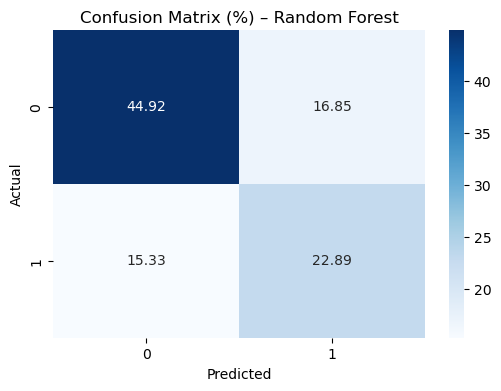

In [5]:
cm_percent = cm / cm.sum() * 100

plt.figure(figsize=(6,4))
sns.heatmap(cm_percent, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (%) – Random Forest")
plt.savefig('../visualizations/final_confusion_matrix.png')
plt.show()


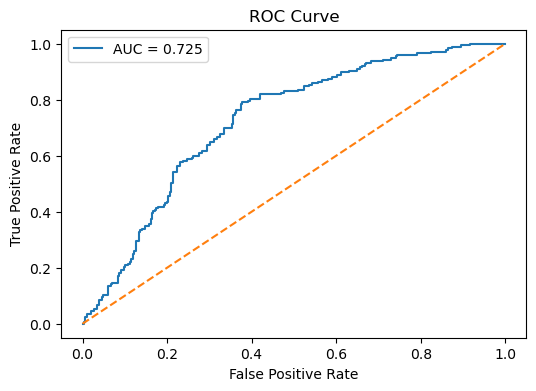

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig('../visualizations/roc_curve.png')
plt.show()


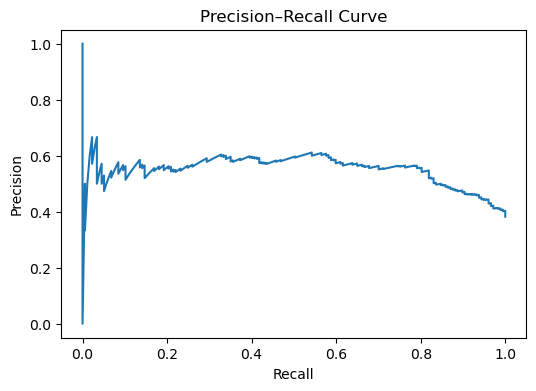

In [7]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.savefig('../visualizations/precision_recall_curve.png')
plt.show()


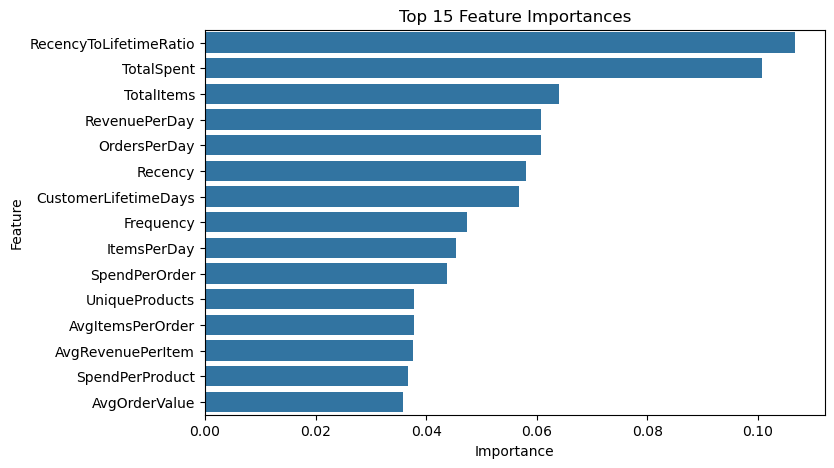

In [8]:
importances = model.feature_importances_
features = X_test.columns

fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=fi)
plt.title("Top 15 Feature Importances")
plt.savefig('../visualizations/feature_importance.png')
plt.show()


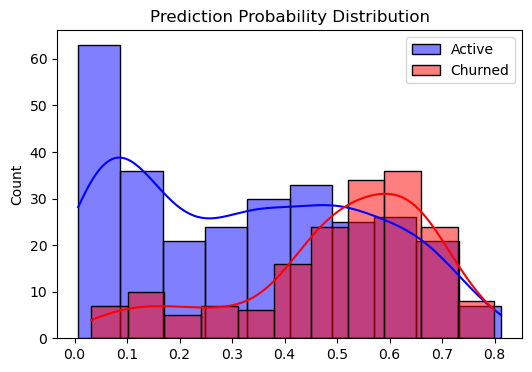

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(y_prob[y_test==0], label='Active', color='blue', kde=True)
sns.histplot(y_prob[y_test==1], label='Churned', color='red', kde=True)
plt.legend()
plt.title("Prediction Probability Distribution")
plt.savefig('../visualizations/prediction_distribution.png')
plt.show()


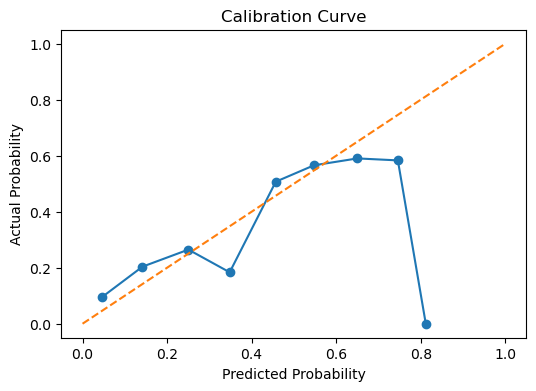

In [10]:
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.title("Calibration Curve")
plt.savefig('../visualizations/calibration_curve.png')
plt.show()


In [11]:
error_df = X_test.copy()
error_df['Actual'] = y_test
error_df['Predicted'] = y_pred
error_df['Probability'] = y_prob

misclassified = error_df[error_df['Actual'] != error_df['Predicted']]
misclassified.head()


,Recency,Frequency,TotalSpent,AvgOrderValue,TotalItems,UniqueProducts,CustomerLifetimeDays,Purchases_Last30Days,Purchases_Last60Days,Purchases_Last90Days,...,RecencyToLifetimeRatio,Recent30to60Ratio,Recent60to90Ratio,SpendPerOrder,SpendPerProduct,FrequencyToLifetimeRatio,ItemsPerDay,Actual,Predicted,Probability
0,-0.516810,-0.434115,-0.285739,0.133884,-0.303610,-0.397724,-0.881342,-0.467970,0.148292,-0.096600,...,-0.109016,-0.620201,0.998991,0.221993,-0.029253,0.793525,1.039685,1,0,0.437113
4,-0.895956,-0.024666,0.201105,0.335351,0.061807,-0.029051,0.129953,0.711796,0.148292,0.392748,...,-0.715743,1.644335,0.366019,0.672514,0.382049,-0.744552,-0.492415,1,0,0.118726
7,-0.474683,-0.434115,-0.512001,-0.967846,-0.410529,-0.485503,-0.881342,-0.467970,0.148292,-0.096600,...,-0.070902,-0.620201,0.998991,-0.846275,-0.910587,0.793525,0.426845,1,0,0.482808
11,2.235503,-0.434115,-0.533984,-0.176640,-0.556696,-0.678617,-0.881342,-0.467970,-0.534042,-0.585947,...,2.381119,-0.620201,-0.899924,-0.950069,-0.440571,0.793525,-0.410962,0,1,0.811972
15,1.098067,-0.434115,-0.490367,-0.370535,-0.478198,-0.590838,-0.881342,-0.467970,-0.534042,-0.585947,...,1.352033,-0.620201,-0.899924,-0.744134,-0.478036,0.793525,0.038971,0,1,0.691313


Q1: False Positives

Customers with high recency but moderate activity

Model predicts churn due to inactivity spikes

Q2: False Negatives

High-frequency customers who suddenly stopped buying

Harder to detect due to historical loyalty

Q3: Patterns

Recent activity features are strongest indicators

Misclassifications cluster near decision boundary (0.4–0.6 probability)